### NAME : S.Sanjith
### ID NO : 190562G
### COURSE CODE : EN2550

In [44]:
#Importing libraries
import matplotlib.pyplot as plt 
from matplotlib import cm
import numpy as np
import cv2 as cv
from skimage.feature import peak_local_max

<ipython-input-2-134e8fb36197>:22: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  surf = ax1.plot_surface(XX,YY,g_x, cmap=cm.jet,lineWidth=0,antialiased=True)
<ipython-input-2-134e8fb36197>:23: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  surf = ax2.plot_surface(XX,YY,g_y, cmap=cm.jet,lineWidth=0,antialiased=True)


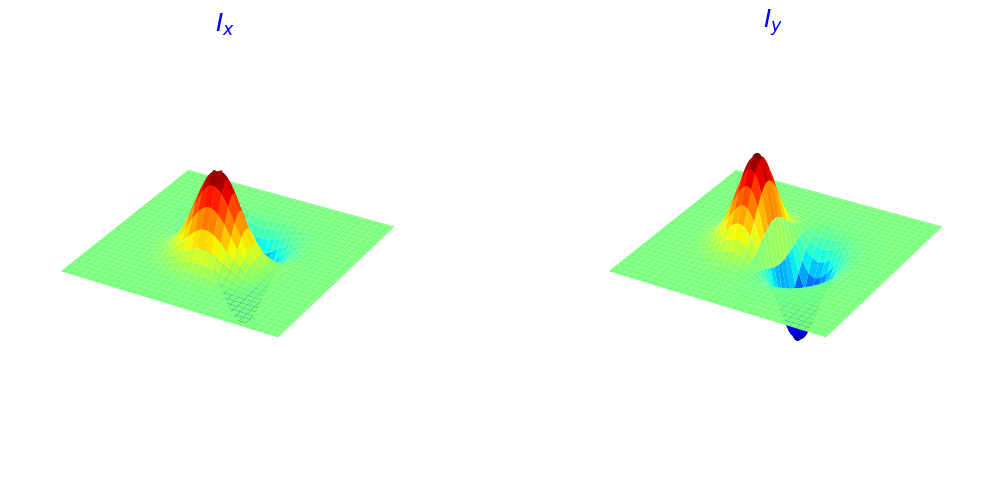

In [2]:
#q1
step = 0.1
X=np.arange(-5,5+step,step)
Y=np.arange(-5,5+step,step)

sigma=1
XX, YY =np.meshgrid(X,Y)
g=np.exp(-(XX**2+YY**2)/(2*sigma**2))
g=g/np.sum(g)

sobel_v=np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float32)
sobel_h=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=np.float32)

g_x=cv.filter2D(g,-1,sobel_v)
g_y=cv.filter2D(g,-1,sobel_h)

fig=plt.figure(figsize=(18,8))
ax1 =fig.add_subplot(121,projection='3d')
ax2 =fig.add_subplot(122,projection='3d')


surf = ax1.plot_surface(XX,YY,g_x, cmap=cm.jet,lineWidth=0,antialiased=True)
surf = ax2.plot_surface(XX,YY,g_y, cmap=cm.jet,lineWidth=0,antialiased=True)
ax1.axis('off')
ax1.set_title("$I_x$",fontsize=25,color='blue')
ax2.axis('off')
ax2.set_title("$I_y$",fontsize=25,color='blue')


plt.show()

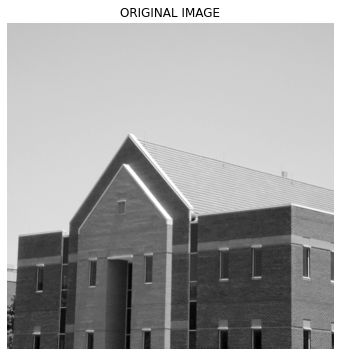

In [48]:
f1=cv.imread(r'images/building.tif',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f1 is not None

fig, ax =plt.subplots(figsize=(6,6)) 
ax.imshow(f1,cmap='gray',vmin=0,vmax=255)
plt.axis("off")
plt.title("ORIGINAL IMAGE")
plt.show()

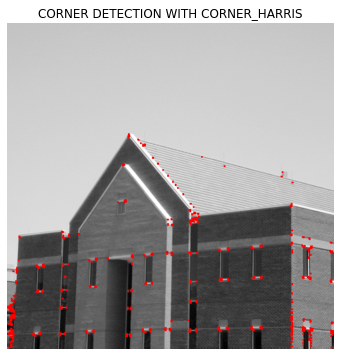

In [19]:
#question 2 : Harris Corner Detector
im=cv.imread('images/building.tif',cv.IMREAD_COLOR) 
assert im is not None

dst=cv.cornerHarris(f1,2,3,0.04)
dst=cv.dilate(dst,None)

im[dst>0.01*dst.max()]=[0,0,255]

fig, ax =plt.subplots(figsize=(6,6))
ax.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax.set_title("CORNER DETECTION WITH CORNER_HARRIS")
ax.axis("off")
plt.show()


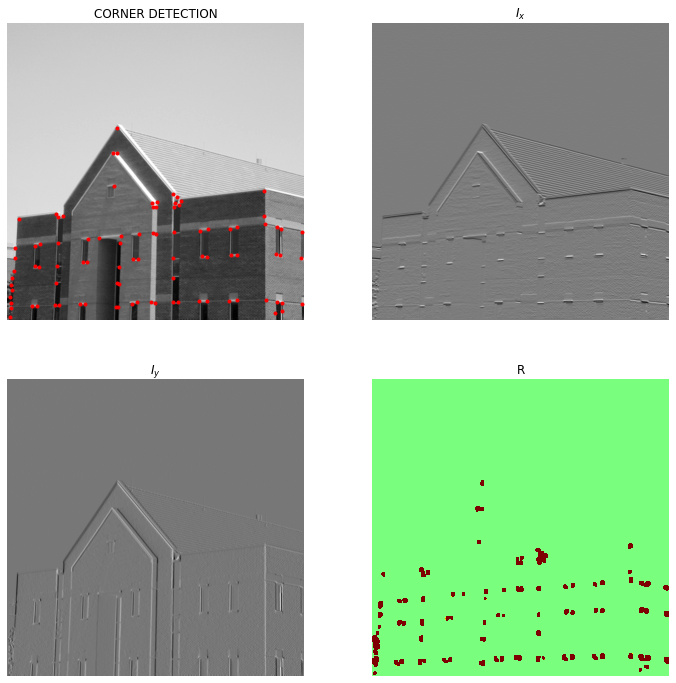

186

In [41]:
#question 3 : own implementation

#COMPUTING PARTIAL DERIVATIVE
sobel_v=np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float32)
sobel_h=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=np.float32)

I_x=cv.filter2D(f1,-1,sobel_v)
I_y=cv.filter2D(f1,-1,sobel_h)

#COMPUTING SECOND MOMENT MATRIX
sigma=3
k_size=7
m11=cv.GaussianBlur(I_x*I_x,(k_size,k_size),sigma)
m12=cv.GaussianBlur(I_x*I_y,(k_size,k_size),sigma)
m21=m12
m22=cv.GaussianBlur(I_y*I_y,(k_size,k_size),sigma)

#COMPUTING CORNER RESPONSE
det=m11*m22-m12*m21
trace=m11+m22
alpha=0.04
R=det-alpha*trace**2

#THRESHOLDING CORNER RESPONSE
R[R<1e8]=0

#FINDING LOCAL MAXIMUM
coordinates= peak_local_max (R,min_distance=2)

fig, ax =plt.subplots(2,2,figsize=(12,12)) 
ax[0,0].imshow(f1,cmap='gray')
ax[0,0].plot(coordinates[:,1],coordinates[:,0],'r.')
ax[0,0].set_title("CORNER DETECTION")
ax[0,1].imshow(I_x+127,cmap='gray')
ax[0,1].set_title("$I_x$")
ax[1,0].imshow(I_y+127,cmap='gray')
ax[1,0].set_title("$I_y$")
ax[1,1].imshow(R+127,cmap=cm.jet,vmin=0,vmax=255)
ax[1,1].set_title("R")

for i in range (4):
    ax[i//2][i%2].axis('off')
plt.show()

coordinates.size

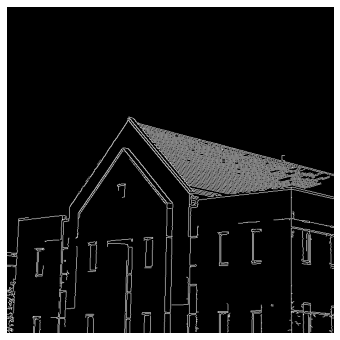

In [49]:
#question 4
edges=cv.Canny(f1,100,200) # low threshold and high threshold

fig, ax =plt.subplots(figsize=(6,6)) 
ax.imshow(edges,cmap='gray',vmin=0,vmax=255)
plt.axis("off")
plt.show()